### 1.Write a python program which searches all the product under a particular product vertical from www.amazon.in

In [67]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException


In [68]:
driver=webdriver.Chrome(r"C:\Users\Hp\Desktop\chromedriver.exe")

In [69]:
driver.get("https://www.amazon.in/")


In [70]:
search_field=driver.find_element_by_id("twotabsearchtextbox")
search_field.send_keys("bags for women")


In [71]:
# clicking the search button
search_button=driver.find_element_by_xpath("//div[@class='nav-search-submit nav-sprite']/span/input")
search_button.click()
    

### 2.Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details"and “Product URL”.

In [72]:
Name=[]
Product=[]
rating=[]
no_of_ratings=[]
price=[]
reurn=[]
delivery=[]
availability=[]
details=[]
URL=[]

In [73]:
import time

In [74]:
for i in range(0,3):
    for i in driver.find_elements_by_xpath("//h5[@class='s-line-clamp-1']/span"):
        Name.append(i.text)
    for j in driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']/a/span"):
        Product.append(j.text)
    for k in driver.find_elements_by_xpath("//span[@class='a-price-whole']"):
        price.append(k.text)
    driver.find_element_by_xpath("//li[@class='a-last']/a").click()
    time.sleep(3)


In [75]:
for i in range(3):
    url=driver.find_element_by_xpath("//a[@class='a-link-normal a-text-normal']").get_attribute('href')
    driver.get(url)

In [88]:
ratings=[]
urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
UR=[]
for i in urls:
    UR.append(i.get_attribute('href'))
for url in UR:
    driver.get(url)
    try:                 
        rate=driver.find_element_by_xpath("//i[@class='a-icon a-icon-star a-star-4']")
        rate.click()                                                      
        rating=driver.find_element_by_xpath("//div[@class='a-icon-row a-spacing-small a-padding-none']/i/span")
        ratings.append(rating.text)
        
    except NoSuchElementException   as e:
        ratings.append("-")

In [92]:
ratingss=[]
for i in range(0,3):
    for url in UR:
        driver.get(url)
        try:                                                         
            rating=driver.find_element_by_xpath("//a[@class='a-link-normal']/span")
            ratingss.append(rating.text)
        
        except NoSuchElementException   as e:
            ratingss.append("-")
    

In [94]:
ratingss[0:3]

['81 ratings', '87 ratings', '87 ratings']

In [95]:
ratings=[]
urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
UR=[]
for i in urls:
    UR.append(i.get_attribute('href'))
for url in UR:
    driver.get(url)
    try:                                                                   
        rating=driver.find_element_by_xpath("//div[@class='a-icon-row a-spacing-small a-padding-none']/i/span")
        ratings.append(rating.text)
        
    except NoSuchElementException   as e:
        ratings.append("-")

In [97]:
for i in range(0,3):
    for url in UR:
        driver.get(url)
        try:                                                         
            deli=driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini']/b")
            delivery.append(deli.text)
        
        except NoSuchElementException   as e:
            delivery.append("-")
    

In [105]:
for i in range(0,3):
    for url in UR:
        driver.get(url)
        try:                                                         
            ava=driver.find_element_by_xpath("//div[@class='a-section a-spacing-none']/span")
            availability.append(ava.text)
        
        except NoSuchElementException   as e:
            availability.append("-")
    

In [104]:

for i in range(0,3):
    for url in UR:
        driver.get(url)
        try:                                                         
            ava=driver.find_element_by_xpath("//div[@class='a-section a-spacing-none  icon-content']/a")
            reurn.append(ava.text)
        
        except NoSuchElementException   as e:
            reurn.append("-")
    

In [106]:
print(len(Name))
print(len(Product))
print(len(price))
print(len(ratings))
print(len(ratingss))
print(len(availability))
print(len(delivery))
print(len(reurn))
print(len(UR))

184
184
192
47
108
423
141
141
47


In [107]:
bags=pd.DataFrame({'brand name':Name[0:47],'product name':Product[0:47],'price':price[0:47],'availability':availability[0:47],'delivery':delivery[0:47],
'Ratings':ratings[0:47],'no_of_ratings':ratingss[0:47],'return':reurn[0:47],'URL':UR[0:47]})
bags

,brand name,product name,price,availability,delivery,Ratings,no_of_ratings,return,URL
0,Lavie,Betula Women's Tote Bag,629,Only 2 left in stock.,"Tuesday, Feb 9",-,81 ratings,30 Days Returns,https://www.amazon.in/dp/B08NXP5H9R/ref=sspa_d...
1,BELLISSA,Maroon PU Leather Combo Handbag for Women,629,Only 3 left in stock.,"Tuesday, Feb 9",-,87 ratings,30 Days Returns,https://www.amazon.in/Satya-Paul-Womens-Should...
2,BELLISSA,Brown Handbag for Women,,Only 3 left in stock.,"Tuesday, Feb 9",-,87 ratings,30 Days Returns,https://www.amazon.in/Satya-Paul-Womens-Should...
3,BELLISSA,"Women's Handbag (Set of 2, Pink)","1,490",Only 2 left in stock.,"Tuesday, Feb 9",-,,30 Days Returns,https://www.amazon.in/Satya-Paul-Womens-Should...
4,Star Dust,Women's Tote Bag,"1,599",Only 1 left in stock.,Feb 8 - 9,-,,30 Days Returns,https://www.amazon.in/Fastrack-Womens-Shoulder...
5,Vintage,Women's Handbag with Pouch (Off-White) (Set of 3),"1,399",In stock.,"Saturday, Feb 6",-,,Pay on Delivery,https://www.amazon.in/TOUARETAILS-Womens-Shoul...
6,Speed X Fashion,Women's Handbag (NSB-010-Tan_Tan),"1,599",Only 2 left in stock.,"Tuesday, Feb 9",-,,30 Days Returns,https://www.amazon.in/Satya-Paul-Womens-Tote-B...
7,WOMEN MARKS,Women's Handbag (NSB000059_Tan),389,Only 3 left in stock.,"Tuesday, Feb 9",-,25 ratings,30 Days Returns,https://www.amazon.in/gp/slredirect/picassoRed...
8,Fostelo,Women's Westside Handbag (Tan) (FSB-551),566,Only 3 left in stock.,"Tuesday, Feb 9",-,25 ratings,30 Days Returns,https://www.amazon.in/gp/slredirect/picassoRed...
9,,,597,Only 3 left in stock.,"Tuesday, Feb 9",-,,30 Days Returns,https://www.amazon.in/gp/slredirect/picassoRed...


### 3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’

In [51]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException


In [102]:
driver=webdriver.Chrome(r"C:\Users\Hp\Desktop\chromedriver.exe")

In [15]:
driver.get("https://images.google.com/?gws_rd=ssl")


In [7]:
search_field_things=driver.find_element_by_xpath("//div[@class='a4bIc']/input")

search_field_things.send_keys("fruits")

# clicking the search button
search_button=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_button.click()

In [8]:
fruits=[]

In [9]:
image_tags=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
image_tags[0:4]

[<selenium.webdriver.remote.webelement.WebElement (session="6fa8f1139a024df13d044d4c9fa9a3b1", element="4cfdbf59-8ea4-4f57-9455-dcc7cba3a518")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6fa8f1139a024df13d044d4c9fa9a3b1", element="bc6a9ff7-404f-411a-b1e8-e46c1215de1f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6fa8f1139a024df13d044d4c9fa9a3b1", element="4aa46620-4855-4adf-8089-a182340121c3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6fa8f1139a024df13d044d4c9fa9a3b1", element="31f08a0d-5356-4073-8a09-30e3025eeb1c")>]

['',
 '']
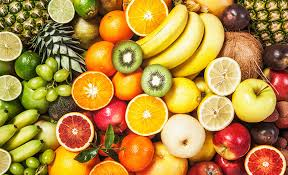
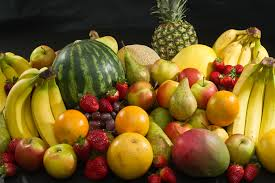

In [11]:
for i in image_tags:
    fruits.append(i.get_attribute('src'))
fruits[0:2]

In [ ]:
driver.get("https://images.google.com/?gws_rd=ssl")


In [16]:
search_field_things=driver.find_element_by_xpath("//div[@class='a4bIc']/input")

search_field_things.send_keys("cars")

# clicking the search button
search_button=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_button.click()

In [17]:
image_tags=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
image_tags[0:4]

[<selenium.webdriver.remote.webelement.WebElement (session="92457be438f2010312f23a202cf957ef", element="48b36ab3-f63e-448b-9849-cee20bf9222f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92457be438f2010312f23a202cf957ef", element="0fc6ebd4-6d2e-4d1c-8ff1-e822dde7f242")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92457be438f2010312f23a202cf957ef", element="c3f48f45-6f64-4aa8-849f-469431a30748")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92457be438f2010312f23a202cf957ef", element="176ef7da-3fe1-4eef-b115-b08db21ffcc6")>]

['',
 '']
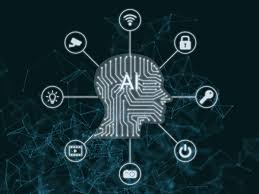
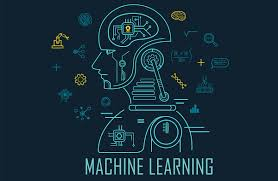

In [29]:
car=[]
for j in range(0,2):
    for i in image_tags:
        if i.text is None :
            car.append("--") 
        else:
            car.append(i.get_attribute('src'))
            
car[0:2]

In [31]:
driver.get("https://images.google.com/?gws_rd=ssl")


In [32]:
search_field_things=driver.find_element_by_xpath("//div[@class='a4bIc']/input")

search_field_things.send_keys("Machine Learning")

# clicking the search button
search_button=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_button.click()

In [33]:
image_tags=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
image_tags[0:4]

[<selenium.webdriver.remote.webelement.WebElement (session="92457be438f2010312f23a202cf957ef", element="d4436e51-637b-49d9-b636-1498b0a53460")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92457be438f2010312f23a202cf957ef", element="33c7f8da-828d-44fd-9359-739544dd1af0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92457be438f2010312f23a202cf957ef", element="536a68cc-fff6-4a8d-9c5d-456769734d3e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92457be438f2010312f23a202cf957ef", element="5750d866-891d-4df9-866d-496ceea93aef")>]

['',
 '']
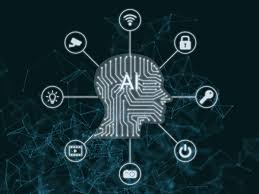
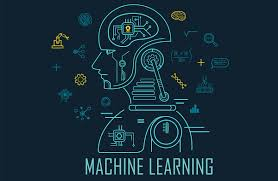

In [45]:
mlrngs=[]
for j in range(0,2):
    for i in image_tags:
        if i.get_attribute('src') is None :
            mlrngs.append("--") 
        else:
            mlrngs.append(i.get_attribute('src'))
            
mlrngs[0:2]

In [46]:
images=pd.DataFrame({})
images['fruits']=fruits[0:100]
images['cars']=car[0:100]
images['Machine Learning ']=mlrngs[0:100]


In [47]:
images

,fruits,cars,Machine Learning
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
...,...,...,...
93,None,None,--
94,None,None,--
95,None,None,--
96,None,None,--


### 4.Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. 

In [181]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
driver=webdriver.Chrome(r"C:\Users\Hp\Desktop\chromedriver.exe")

In [182]:
driver.get("https://www.flipkart.com/search?q=smartphone&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_10_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_10_na_na_na&as-pos=2&as-type=RECENT&suggestionId=smartphone%7CMobiles&requestId=d74c283a-5e00-4d3f-af41-7b8879162f45&as-searchtext=smartphone")

In [183]:
brand=[]
product=[]
color=[]
ram=[]
rom=[]
pcan=[]
scam=[]
dsize=[]
dreso=[]
processor=[]
processor_cores=[]
battery=[]
price=[]
URL=[]

In [184]:
brands=driver.find_elements_by_xpath("//div[@class='col col-7-12']/div[1]")
for i in brands:
    if i.text is None :
        brand.append("--") 
    else:
        brand.append(i.text)
brand[0:2]

['POCO M2 (Slate Blue, 64 GB)', 'POCO C3 (Arctic Blue, 64 GB)']

In [185]:
RAM=[]
rams=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")
for i in rams:
    if i.text is None :
        RAM.append("--") 
    else:
        RAM.append(i.text)
RAM[0:2]

['6 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB']

In [186]:
display=[]
displays=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[2]")
for i in displays:
    if i.text is None :
        display.append("--") 
    else:
        display.append(i.text)
display[0:2]

['16.59 cm (6.53 inch) Full HD+ Display', '16.59 cm (6.53 inch) HD+ Display']

In [187]:
scame=[]
scams=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")
for i in scams:
    if i.text is None :
        scame.append("--") 
    else:
        scame.append(i.text)
scame[0:2]

['13MP + 8MP + 5MP + 2MP | 8MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera']

In [188]:
batteries=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[4]")
for i in batteries:
    if i.text is None :
        battery.append("--") 
    else:
        battery.append(i.text)
battery[0:2]

['5000 mAh Lithium Polymer Battery', '5000 mAh Li-ion Polymer Battery']

In [189]:
processors=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[5]")
for i in processors:
    if i.text is None :
        processor.append("--") 
    else:
        processor.append(i.text)
processor[0:2]

['MediaTek Helio G80 Processor', 'Mediatek Helio G35 Processor']

In [190]:
prices=driver.find_elements_by_xpath("//div[@class='_36fx1h _6t1WkM _3HqJxg']/div[1]/div[2]/div[2]/div/div/div/a/div[2]/div[2]/div[1]/div/div[1]")
prices

[<selenium.webdriver.remote.webelement.WebElement (session="9ba293ce20dc75e60b0bea58bdfc651d", element="8dc3a099-8347-47bf-981d-21e77113aa3e")>]

In [191]:
prices=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")

In [192]:

for i in prices:
    if i.text is None :
        price.append("--") 
    else:
        price.append(i.text)
price

['₹9,999',
 '₹8,499',
 '₹9,999',
 '₹3,799',
 '₹9,499',
 '₹9,499',
 '₹11,499',
 '₹11,499',
 '₹10,499',
 '₹10,499',
 '₹10,999',
 '₹8,499',
 '₹9,499',
 '₹9,499',
 '₹9,499',
 '₹9,999',
 '₹10,999',
 '₹8,299',
 '₹12,999',
 '₹13,999',
 '₹12,999',
 '₹12,999',
 '₹10,999',
 '₹7,999']

In [193]:
tags=driver.find_elements_by_xpath("//div[@class='_2kHMtA']/a")
tags[0:4]

[<selenium.webdriver.remote.webelement.WebElement (session="9ba293ce20dc75e60b0bea58bdfc651d", element="6902fc7d-1499-4b77-a4a7-b2411d385165")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ba293ce20dc75e60b0bea58bdfc651d", element="0aba11e6-8210-4cc1-b32c-fd7fdc05a387")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ba293ce20dc75e60b0bea58bdfc651d", element="8a20aae2-5b47-4536-9e5b-ae7980788b8e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9ba293ce20dc75e60b0bea58bdfc651d", element="a9d212c5-8c93-489a-8b3f-22930ad2a85c")>]

In [194]:
for i in tags:
    URL.append(i.get_attribute('href'))
URL[0:4]

['https://www.flipkart.com/poco-m2-slate-blue-64-gb/p/itmfd82e37cf60fb?pid=MOBFV9V96DHYMUHJ&lid=LSTMOBFV9V96DHYMUHJLEC0DY&marketplace=FLIPKART&srno=s_1_1&otracker=AS_QueryStore_OrganicAutoSuggest_2_10_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_10_na_na_na&fm=organic&iid=e9c7bd7f-65ab-43e4-abda-6a4927012836.MOBFV9V96DHYMUHJ.SEARCH&ssid=evs54dyc9c0000001612271799303&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/poco-c3-arctic-blue-64-gb/p/itm7f632fdb49b3b?pid=MOBFVQJ5NV9ZSYEF&lid=LSTMOBFVQJ5NV9ZSYEFDNRK58&marketplace=FLIPKART&srno=s_1_2&otracker=AS_QueryStore_OrganicAutoSuggest_2_10_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_10_na_na_na&fm=organic&iid=e9c7bd7f-65ab-43e4-abda-6a4927012836.MOBFVQJ5NV9ZSYEF.SEARCH&ssid=evs54dyc9c0000001612271799303&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/poco-m2-pitch-black-64-gb/p/itm630300707d0a5?pid=MOBFV9V92KHMFCVF&lid=LSTMOBFV9V92KHMFCVFEXYXG8&marketplace=FLIPKART&srno=s_1_3&otracker=AS_QueryStore_OrganicAutoSuggest_2_

In [195]:
smartphone=pd.DataFrame({})
smartphone['Name(colour)']=brand
smartphone['RAM|ROM']=RAM
smartphone['Primary Camera|Secondary Camera']=scame
smartphone['Display size display resolution']=display
smartphone['Processor|processor core']=processor
smartphone['Battery capacity']=battery
smartphone['Price']=price
smartphone['URL']=URL

In [196]:
smartphone

,Name(colour),RAM|ROM,Primary Camera|Secondary Camera,Display size display resolution,Processor|processor core,Battery capacity,Price,URL
0,"POCO M2 (Slate Blue, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,MediaTek Helio G80 Processor,5000 mAh Lithium Polymer Battery,"₹9,999",https://www.flipkart.com/poco-m2-slate-blue-64...
1,"POCO C3 (Arctic Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,Mediatek Helio G35 Processor,5000 mAh Li-ion Polymer Battery,"₹8,499",https://www.flipkart.com/poco-c3-arctic-blue-6...
2,"POCO M2 (Pitch Black, 64 GB)",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP + 8MP + 5MP + 2MP | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,MediaTek Helio G80 Processor,5000 mAh Lithium Polymer Battery,"₹9,999",https://www.flipkart.com/poco-m2-pitch-black-6...
3,"I Kall K-1 (Black, 8 GB)",1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,1.3 QUAD CORE PROCESSOR Processor,2200 mAh Battery,"₹3,799",https://www.flipkart.com/kall-k-1-black-8-gb/p...
4,"Realme Narzo 20A (Glory Silver, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,12MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,Qualcomm Snapdragon 665 Processor,5000 mAh Lithium-ion Battery,"₹9,499",https://www.flipkart.com/realme-narzo-20a-glor...
5,"Realme Narzo 20A (Victory Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,12MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,Qualcomm Snapdragon 665 Processor,5000 mAh Lithium-ion Battery,"₹9,499",https://www.flipkart.com/realme-narzo-20a-vict...
6,"Realme Narzo 20 (Glory Silver, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,48MP + 8MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,MediaTek Helio G85 Processor,6000 mAh Lithium-ion Battery,"₹11,499",https://www.flipkart.com/realme-narzo-20-glory...
7,"Realme Narzo 20 (Victory Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,48MP + 8MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,MediaTek Helio G85 Processor,6000 mAh Lithium-ion Battery,"₹11,499",https://www.flipkart.com/realme-narzo-20-victo...
8,"Realme Narzo 20 (Glory Silver, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,48MP + 8MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,MediaTek Helio G85 Processor,6000 mAh Lithium-ion Battery,"₹10,499",https://www.flipkart.com/realme-narzo-20-glory...
9,"Realme Narzo 20 (Victory Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,48MP + 8MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,MediaTek Helio G85 Processor,6000 mAh Lithium-ion Battery,"₹10,499",https://www.flipkart.com/realme-narzo-20-victo...


### 5.Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps

In [2]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException


In [3]:
driver=webdriver.Chrome(r"C:\Users\Hp\Desktop\chromedriver.exe")

In [4]:
driver.get("https://www.google.com/maps/@21.1613484,78.9324213,11z")


In [5]:
search_field_things=driver.find_element_by_id("searchboxinput")

search_field_things.send_keys("Nagpur")

# clicking the search button
search_button=driver.find_element_by_xpath("//div[@class='searchbox-searchbutton-container']/button")
search_button.click()

### 6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –September 20) from trak.in.


In [1]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException


In [3]:
driver=webdriver.Chrome(r"C:\Users\Hp\Desktop\chromedriver.exe")

In [4]:
driver.get("https://trak.in/india-startup-funding-investment-2015/")


In [5]:
entry=[]

In [8]:
tags=driver.find_elements_by_xpath("//tbody[@class='row-hover']")
tags[0:4]

[<selenium.webdriver.remote.webelement.WebElement (session="56ff6d407a758a7990805d9305da4653", element="c7d2309a-132c-428f-9d3b-873d6339dc9c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56ff6d407a758a7990805d9305da4653", element="54876e08-4aa2-4f04-b586-af8751937fa6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56ff6d407a758a7990805d9305da4653", element="9f2b9a98-127c-4db4-904b-f9ddec756fd0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="56ff6d407a758a7990805d9305da4653", element="d8124479-cdb3-4b89-b9cb-85d7b61b7798")>]

In [12]:
entries=[]
for i in tags:
    if i.text is None :
        entries.append("--") 
    else:
        entries.append(i.text)

['1 08/09/2020 Byju’s EduTech Online Tutoring Bangalore Silver Lake, Tiger Global, General Atlantic and Owl Ventures\nPrivate Equity 500,000,000\n2 12/09/2020 mCaffeine Personal Care Skincare & Haircare Mumbai Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1 Series B 3,000,000\n3 09/09/2020 Qshala EduTech Online Curiosity Platform for Kids Bangalore Rainmatter Capital Angel 370,000\n4 02/09/2020 Winzo Online Gaming Online Gaming New Delhi Kalaari Capital Partners, IndigoEdge Management Consultancy Series B 15,500,000\n5 09/09/2020 Hippo Video Video Customer Experience(CX) Platform Video Customer Experience(CX) Platform Newark, Delaware, United States of Amercia Alpha Wave Incubation, Exfinity Venture Partners and existing backers.\nSeries A 4,500,000\n6 07/09/2020 Melorra E-commerce Online Jewelry Store\nBangalore Shadow Holdings, Lightbox. Debt Financing upto 8,900,000\n7 07/09/2020 1mg E-commerce Online Pharmacy Gurgaon Gaja Capital, 

In [121]:
val="""1 08/09/2020 Byju’s EduTech Online Tutoring Bangalore Silver Lake, Tiger Global, General Atlantic and Owl Ventures\nPrivate Equity 500,000,000\n2 12/09/2020 mCaffeine Personal Care Skincare & Haircare Mumbai Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1 Series B 3,000,000\n3 09/09/2020 Qshala EduTech Online Curiosity Platform for Kids Bangalore Rainmatter Capital Angel 370,000\n4 02/09/2020 Winzo Online Gaming Online Gaming New Delhi Kalaari Capital Partners, IndigoEdge Management Consultancy Series B 15,500,000\n5 09/09/2020 Hippo Video Video Customer Experience(CX) Platform Video Customer Experience(CX) Platform Newark, Delaware, United States of Amercia Alpha Wave Incubation, Exfinity Venture Partners and existing backers.\nSeries A 4,500,000\n6 07/09/2020 Melorra E-commerce Online Jewelry Store\nBangalore Shadow Holdings, Lightbox. Debt Financing upto 8,900,000\n7 07/09/2020 1mg E-commerce Online Pharmacy Gurgaon Gaja Capital, Tata Capital, Partners Group In Progress 100,000,000\n8 31/08/2020 mfine HealthTech On-Demand Healthcare Services Bangalore Caretech Pte Inc Series B 5,400,000\n9 31/08/2020 Apna Human Resources Recruitment Platform Bangalore Lightspeed India and Sequoia Capital India Series A 8,000,000\n10 03/09/2020 Railofy Transportation WL & RAC protection platform Mumbai Chiratae Ventures Seed 950,000',
'1 15/08/2020 Practo HealthTech Health care and Wellness Bangalore A1A Company\nSeries F 32,000,000\n2 13/08/2020 Medlife E-commerce Online Pharmacy Bangalore Prasid Uno Family Trust and SC Credit Fund 23,000,000\n3 13/08/2020 HungerBox\nFoodTech Online Food Delivery Service Bangalore One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar Series D1 1,560,000\n4 04/08/2020 Dunzo Hyper-local Logistics Online Delivery Services Bangalore Existing Backers In Progress 30,000,000\n5 11/08/2020 Terra.do EduTech Online Climate School, E-learning Stanford, California, Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital\n\nSeed 1,400,000\n6 12/08/2020 Classplus EduTech E-learning, Online Tutoring\n\nNoida Falcon Edge In Progress upto 15,000,000\n7 14/08/2020 Niyo FinTech Financial Services Bangalore Niyo Solutions Inc. 6,000,000\n8 10/08/2020 ZestMoney FinTech Financial Services Bangalore Primrose Hills Ventures 10,670,000\n9 07/08/2020 FreshToHome E-commerce Food Delivery Bangalore Ascent Capital Venture 16,200,000\n10 13/08/2020 Eduvanz FinTech Financial Services Mumbai Sequoia India, Unitus Series A 5,000,000',
 '1 15/07/2020 Flipkart E-commerce E-commerce Bangalore Walmart Inc\nM&A 1,200,000,000\n2 16/07/2020 Vedantu EduTech Online Tutoring Bangalore Coatue Management Series D 100,000,000\n3 16/07/2020 Crio EduTech Learning Platform for Developers Bangalore 021 Capital pre-Series A 934,160\n4 14/07/2020 goDutch FinTech Group Payments Mumbai Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq. Seed 1,700,000\n5 13/07/2020 Mystifly\nAirfare Marketplace Ticketing, Airline Retailing, and Post-Ticketing Services Singapore and Bangalore Recruit Co. Ltd.\n\npre-Series B 3,300,000\n6 09/07/2020 JetSynthesys Gaming and Entertainment Gaming and Entertainment\n\nPune Adar Poonawalla and Kris Gopalakrishnan.\nVenture-Series Unknown 400,000\n7 10/07/2020 gigIndia\nMarketplace Crowd Sourcing, Freelance Pune Incubate Fund India and Beyond Next Ventures pre-Series A 974,200\n8 15/07/2020 PumPumPum Automotive Rental Used Car-leasing platform Gurgaon Early Adapters Syndicate Seed 292,800\n9 14/07/2020 FLYX OTT Player Streaming Social Network New York and Delhi Raj Mishra, founder of AIT Global Inc pre-Seed 200,000\n10 13/07/2020 Open Appliances Pvt. Ltd. Information Technology Internet-of-Things Security Solutions Bangalore Unicorn India Ventures Venture-Series Unknown 500,000"""

In [122]:
val=val.split('\n')
val

['1 08/09/2020 Byju’s EduTech Online Tutoring Bangalore Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Private Equity 500,000,000',
 '2 12/09/2020 mCaffeine Personal Care Skincare & Haircare Mumbai Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1 Series B 3,000,000',
 '3 09/09/2020 Qshala EduTech Online Curiosity Platform for Kids Bangalore Rainmatter Capital Angel 370,000',
 '4 02/09/2020 Winzo Online Gaming Online Gaming New Delhi Kalaari Capital Partners, IndigoEdge Management Consultancy Series B 15,500,000',
 '5 09/09/2020 Hippo Video Video Customer Experience(CX) Platform Video Customer Experience(CX) Platform Newark, Delaware, United States of Amercia Alpha Wave Incubation, Exfinity Venture Partners and existing backers.',
 'Series A 4,500,000',
 '6 07/09/2020 Melorra E-commerce Online Jewelry Store',
 'Bangalore Shadow Holdings, Lightbox. Debt Financing upto 8,900,000',
 '7 07/09/2020 1mg E-commerce Online Phar

### 7. Write a program to scrap all the available details of top 10 gaming laptops from digit.in. 

In [95]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException


In [96]:
driver=webdriver.Chrome(r"C:\Users\Hp\Desktop\chromedriver.exe")

In [97]:
driver.get("https://www.digit.in/top-products/best-gaming-laptops-40.html")


In [98]:
product_name=[]
seller=[]
price=[]

In [99]:
tags=driver.find_elements_by_xpath("//div[@class='Top10-Seller']")
tags[0:4]

[<selenium.webdriver.remote.webelement.WebElement (session="f6277324ca77aee5c4b2ec14f866dcda", element="77e1bc6e-06a2-43fe-90dc-fbcc0c60af8c")>]

In [100]:
product=[]
for i in tags:
    if i.text is None :
        product.append("--") 
    else:
        product.append(i.text)
product

['List Of Best Gaming Laptops In India\nPRODUCT NAME SELLER PRICE\nMSI GT76 TITAN DT 9SG N/A ₹379990\nAlienware 17 Area-51m amazon ₹489909\nHP Omen 15 2020 Tatacliq ₹117790\nAsus Zephyrus G14 amazon ₹164990\nLenovo Legion Y540 flipkart ₹79990\nAsus ROG Zephyrus G GA502 flipkart ₹79990\nAsus ROG Zephyrus S GX531 amazon ₹146000\nMSI GT83VR 7RE Titan SLI N/A ₹349990\nASUS ROG ZEPHYRUS DUO 15 amazon ₹269975\nDell G3 amazon ₹61990']

In [101]:
val="""MSI GT76 TITAN DT 9SG N/A ₹379990\nAlienware 17 Area-51m amazon ₹489909\nHP Omen 15 2020 Tatacliq ₹117790\nAsus Zephyrus G14 amazon ₹164990\nLenovo Legion Y540 flipkart ₹79990\nAsus ROG Zephyrus G GA502 flipkart ₹79990\nAsus ROG Zephyrus S GX531 amazon ₹146000\nMSI GT83VR 7RE Titan SLI N/A ₹349990\nASUS ROG ZEPHYRUS DUO 15 amazon ₹269975\nDell G3 amazon ₹61990'"""

In [102]:
val=val.split('\n')
val

['MSI GT76 TITAN DT 9SG N/A ₹379990',
 'Alienware 17 Area-51m amazon ₹489909',
 'HP Omen 15 2020 Tatacliq ₹117790',
 'Asus Zephyrus G14 amazon ₹164990',
 'Lenovo Legion Y540 flipkart ₹79990',
 'Asus ROG Zephyrus G GA502 flipkart ₹79990',
 'Asus ROG Zephyrus S GX531 amazon ₹146000',
 'MSI GT83VR 7RE Titan SLI N/A ₹349990',
 'ASUS ROG ZEPHYRUS DUO 15 amazon ₹269975',
 "Dell G3 amazon ₹61990'"]

In [103]:
seller=[i.split(" ")[-2] for i in val]
seller

['N/A',
 'amazon',
 'Tatacliq',
 'amazon',
 'flipkart',
 'flipkart',
 'amazon',
 'N/A',
 'amazon',
 'amazon']

In [104]:
price=[i.split(" ")[-1] for i in val]
price

['₹379990',
 '₹489909',
 '₹117790',
 '₹164990',
 '₹79990',
 '₹79990',
 '₹146000',
 '₹349990',
 '₹269975',
 "₹61990'"]

In [105]:
val="MSI GT76 TITAN DT 9SG,Alienware 17 Area-51m,HP Omen 15 2020,Asus Zephyrus G14,Lenovo Legion Y540,Asus ROG Zephyrus G GA502,Asus ROG Zephyrus S GX531,MSI GT83VR 7RE Titan SLI,ASUS ROG ZEPHYRUS DUO 15,Dell G3"

In [106]:
val=val.split("\n")
val

['MSI GT76 TITAN DT 9SG,Alienware 17 Area-51m,HP Omen 15 2020,Asus Zephyrus G14,Lenovo Legion Y540,Asus ROG Zephyrus G GA502,Asus ROG Zephyrus S GX531,MSI GT83VR 7RE Titan SLI,ASUS ROG ZEPHYRUS DUO 15,Dell G3']

In [115]:
value=[i.split(',')[0:10] for i in val]

In [116]:
product_name=value[0]
product_name

['MSI GT76 TITAN DT 9SG',
 'Alienware 17 Area-51m',
 'HP Omen 15 2020',
 'Asus Zephyrus G14',
 'Lenovo Legion Y540',
 'Asus ROG Zephyrus G GA502',
 'Asus ROG Zephyrus S GX531',
 'MSI GT83VR 7RE Titan SLI',
 'ASUS ROG ZEPHYRUS DUO 15',
 'Dell G3']

In [118]:
gaming_laptops=pd.DataFrame({})
gaming_laptops['product']=product_name
gaming_laptops['seller']=seller
gaming_laptops['price']=price
gaming_laptops

,product,seller,price
0,MSI GT76 TITAN DT 9SG,N/A,₹379990
1,Alienware 17 Area-51m,amazon,₹489909
2,HP Omen 15 2020,Tatacliq,₹117790
3,Asus Zephyrus G14,amazon,₹164990
4,Lenovo Legion Y540,flipkart,₹79990
5,Asus ROG Zephyrus G GA502,flipkart,₹79990
6,Asus ROG Zephyrus S GX531,amazon,₹146000
7,MSI GT83VR 7RE Titan SLI,N/A,₹349990
8,ASUS ROG ZEPHYRUS DUO 15,amazon,₹269975
9,Dell G3,amazon,₹61990'
